In [2]:
from __future__ import print_function
import torch

import torch.optim as optim
from torchvision import datasets, transforms

from PIL import Image
import time
import cv2
import matplotlib.pyplot as plt
import numpy as np


In [3]:
from utils import train_transforms, test_transforms

In [4]:
class CIFAR10Dataset(datasets.CIFAR10):
    def __init__(self, root, train=True, transform=None, target_transform=None, download=False):
        super().__init__(root, train=train, transform=transform, target_transform=target_transform, download=download)

    def __getitem__(self, index):
        image, label = self.data[index], self.targets[index]
        if self.transforms is not None:
          transformed = self.transform(image=image)
          image = transformed["image"]
        return image, label

In [5]:
train = CIFAR10Dataset(root='./data', train=True, transform=train_transforms, download=True)
test = CIFAR10Dataset(root='./data', train=False, transform=test_transforms, download=True)

Files already downloaded and verified
Files already downloaded and verified


In [6]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=512, num_workers=0, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA Available? True


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


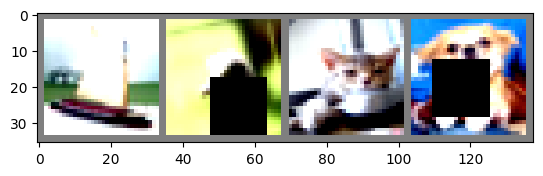

ship  bird  cat   dog  


In [7]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

import torchvision
# show images
imshow(torchvision.utils.make_grid(images[:4]))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [8]:
from models import Net

In [9]:
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Net().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
       BatchNorm2d-2           [-1, 32, 32, 32]              64
              ReLU-3           [-1, 32, 32, 32]               0
           Dropout-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 64, 32, 32]          18,432
       BatchNorm2d-6           [-1, 64, 32, 32]             128
              ReLU-7           [-1, 64, 32, 32]               0
           Dropout-8           [-1, 64, 32, 32]               0
            Conv2d-9           [-1, 32, 16, 16]          18,432
          Dropout-10           [-1, 32, 16, 16]               0
           Conv2d-11           [-1, 64, 16, 16]          18,432
      BatchNorm2d-12           [-1, 64, 16, 16]             128
             ReLU-13           [-1, 64, 16, 16]               0
          Dropout-14           [-1

In [10]:
import utils

In [11]:
from torch.optim.lr_scheduler import StepLR

model =  Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
# scheduler = StepLR(optimizer, step_size=6, gamma=0.1)


EPOCHS = 51
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    utils.train(model, device, train_loader, optimizer, epoch)
    # scheduler.step()
    utils.test(model, device, test_loader)

EPOCH: 0


Loss=1.8942149877548218 Batch_id=97 Accuracy=19.89: 100%|██████████| 98/98 [00:12<00:00,  8.09it/s]



Test set: Average loss: 1.8570, Accuracy: 2718/10000 (27.18%)

EPOCH: 1


Loss=1.700166940689087 Batch_id=97 Accuracy=31.31: 100%|██████████| 98/98 [00:11<00:00,  8.24it/s] 



Test set: Average loss: 1.9361, Accuracy: 3289/10000 (32.89%)

EPOCH: 2


Loss=1.4836159944534302 Batch_id=97 Accuracy=40.07: 100%|██████████| 98/98 [00:11<00:00,  8.27it/s]



Test set: Average loss: 1.4167, Accuracy: 4635/10000 (46.35%)

EPOCH: 3


Loss=1.3337496519088745 Batch_id=97 Accuracy=46.23: 100%|██████████| 98/98 [00:11<00:00,  8.30it/s]



Test set: Average loss: 1.3508, Accuracy: 5130/10000 (51.30%)

EPOCH: 4


Loss=1.3336783647537231 Batch_id=97 Accuracy=50.88: 100%|██████████| 98/98 [00:11<00:00,  8.36it/s]



Test set: Average loss: 1.2854, Accuracy: 5322/10000 (53.22%)

EPOCH: 5


Loss=1.1309075355529785 Batch_id=97 Accuracy=54.61: 100%|██████████| 98/98 [00:11<00:00,  8.23it/s]



Test set: Average loss: 1.2119, Accuracy: 5766/10000 (57.66%)

EPOCH: 6


Loss=1.1336126327514648 Batch_id=97 Accuracy=57.34: 100%|██████████| 98/98 [00:12<00:00,  8.14it/s]



Test set: Average loss: 1.0708, Accuracy: 6209/10000 (62.09%)

EPOCH: 7


Loss=1.058115005493164 Batch_id=97 Accuracy=59.65: 100%|██████████| 98/98 [00:12<00:00,  8.14it/s] 



Test set: Average loss: 0.9583, Accuracy: 6511/10000 (65.11%)

EPOCH: 8


Loss=0.9631409645080566 Batch_id=97 Accuracy=61.51: 100%|██████████| 98/98 [00:12<00:00,  8.16it/s]



Test set: Average loss: 0.8689, Accuracy: 6873/10000 (68.73%)

EPOCH: 9


Loss=1.0281668901443481 Batch_id=97 Accuracy=63.46: 100%|██████████| 98/98 [00:11<00:00,  8.21it/s]



Test set: Average loss: 0.9238, Accuracy: 6720/10000 (67.20%)

EPOCH: 10


Loss=0.8868533372879028 Batch_id=97 Accuracy=64.89: 100%|██████████| 98/98 [00:12<00:00,  8.14it/s]



Test set: Average loss: 0.8373, Accuracy: 7028/10000 (70.28%)

EPOCH: 11


Loss=0.9270992279052734 Batch_id=97 Accuracy=66.10: 100%|██████████| 98/98 [00:11<00:00,  8.17it/s]



Test set: Average loss: 0.8668, Accuracy: 6959/10000 (69.59%)

EPOCH: 12


Loss=0.9964320063591003 Batch_id=97 Accuracy=67.45: 100%|██████████| 98/98 [00:11<00:00,  8.28it/s]



Test set: Average loss: 0.7826, Accuracy: 7294/10000 (72.94%)

EPOCH: 13


Loss=0.8985536694526672 Batch_id=97 Accuracy=68.55: 100%|██████████| 98/98 [00:11<00:00,  8.27it/s]



Test set: Average loss: 0.7560, Accuracy: 7386/10000 (73.86%)

EPOCH: 14


Loss=0.8640304803848267 Batch_id=97 Accuracy=69.66: 100%|██████████| 98/98 [00:11<00:00,  8.25it/s]



Test set: Average loss: 0.7092, Accuracy: 7514/10000 (75.14%)

EPOCH: 15


Loss=0.9142242670059204 Batch_id=97 Accuracy=70.01: 100%|██████████| 98/98 [00:12<00:00,  8.12it/s]



Test set: Average loss: 0.6534, Accuracy: 7757/10000 (77.57%)

EPOCH: 16


Loss=0.8461915254592896 Batch_id=97 Accuracy=70.98: 100%|██████████| 98/98 [00:11<00:00,  8.24it/s]



Test set: Average loss: 0.6875, Accuracy: 7625/10000 (76.25%)

EPOCH: 17


Loss=0.766706109046936 Batch_id=97 Accuracy=71.41: 100%|██████████| 98/98 [00:11<00:00,  8.17it/s] 



Test set: Average loss: 0.6815, Accuracy: 7649/10000 (76.49%)

EPOCH: 18


Loss=0.8912757039070129 Batch_id=97 Accuracy=72.18: 100%|██████████| 98/98 [00:12<00:00,  8.15it/s]



Test set: Average loss: 0.6331, Accuracy: 7881/10000 (78.81%)

EPOCH: 19


Loss=0.7678874135017395 Batch_id=97 Accuracy=72.60: 100%|██████████| 98/98 [00:11<00:00,  8.17it/s]



Test set: Average loss: 0.6496, Accuracy: 7775/10000 (77.75%)

EPOCH: 20


Loss=0.8141878247261047 Batch_id=97 Accuracy=72.95: 100%|██████████| 98/98 [00:11<00:00,  8.20it/s]



Test set: Average loss: 0.6080, Accuracy: 7871/10000 (78.71%)

EPOCH: 21


Loss=0.744033932685852 Batch_id=97 Accuracy=73.44: 100%|██████████| 98/98 [00:12<00:00,  8.13it/s] 



Test set: Average loss: 0.5859, Accuracy: 7998/10000 (79.98%)

EPOCH: 22


Loss=0.733238935470581 Batch_id=97 Accuracy=73.91: 100%|██████████| 98/98 [00:11<00:00,  8.20it/s] 



Test set: Average loss: 0.5872, Accuracy: 7954/10000 (79.54%)

EPOCH: 23


Loss=0.7117785811424255 Batch_id=97 Accuracy=74.29: 100%|██████████| 98/98 [00:11<00:00,  8.27it/s]



Test set: Average loss: 0.5534, Accuracy: 8091/10000 (80.91%)

EPOCH: 24


Loss=0.6740023493766785 Batch_id=97 Accuracy=74.86: 100%|██████████| 98/98 [00:11<00:00,  8.26it/s]



Test set: Average loss: 0.6371, Accuracy: 7854/10000 (78.54%)

EPOCH: 25


Loss=0.6190874576568604 Batch_id=97 Accuracy=75.18: 100%|██████████| 98/98 [00:11<00:00,  8.24it/s]



Test set: Average loss: 0.5852, Accuracy: 7999/10000 (79.99%)

EPOCH: 26


Loss=0.7608874440193176 Batch_id=97 Accuracy=75.30: 100%|██████████| 98/98 [00:12<00:00,  8.11it/s]



Test set: Average loss: 0.5469, Accuracy: 8114/10000 (81.14%)

EPOCH: 27


Loss=0.6192095279693604 Batch_id=97 Accuracy=75.80: 100%|██████████| 98/98 [00:12<00:00,  8.16it/s]



Test set: Average loss: 0.5295, Accuracy: 8216/10000 (82.16%)

EPOCH: 28


Loss=0.8056418299674988 Batch_id=97 Accuracy=75.89: 100%|██████████| 98/98 [00:11<00:00,  8.31it/s]



Test set: Average loss: 0.5548, Accuracy: 8101/10000 (81.01%)

EPOCH: 29


Loss=0.7408990263938904 Batch_id=97 Accuracy=76.03: 100%|██████████| 98/98 [00:11<00:00,  8.30it/s]



Test set: Average loss: 0.5132, Accuracy: 8261/10000 (82.61%)

EPOCH: 30


Loss=0.7399972677230835 Batch_id=97 Accuracy=76.71: 100%|██████████| 98/98 [00:11<00:00,  8.23it/s]



Test set: Average loss: 0.4764, Accuracy: 8355/10000 (83.55%)

EPOCH: 31


Loss=0.7695485949516296 Batch_id=97 Accuracy=76.79: 100%|██████████| 98/98 [00:11<00:00,  8.17it/s]



Test set: Average loss: 0.5024, Accuracy: 8266/10000 (82.66%)

EPOCH: 32


Loss=0.6625464558601379 Batch_id=97 Accuracy=77.12: 100%|██████████| 98/98 [00:11<00:00,  8.17it/s]



Test set: Average loss: 0.5269, Accuracy: 8193/10000 (81.93%)

EPOCH: 33


Loss=0.6025756001472473 Batch_id=97 Accuracy=77.31: 100%|██████████| 98/98 [00:12<00:00,  8.17it/s]



Test set: Average loss: 0.4988, Accuracy: 8334/10000 (83.34%)

EPOCH: 34


Loss=0.7306334972381592 Batch_id=97 Accuracy=77.51: 100%|██████████| 98/98 [00:12<00:00,  8.16it/s]



Test set: Average loss: 0.4765, Accuracy: 8357/10000 (83.57%)

EPOCH: 35


Loss=0.7025015354156494 Batch_id=97 Accuracy=77.75: 100%|██████████| 98/98 [00:11<00:00,  8.18it/s]



Test set: Average loss: 0.5015, Accuracy: 8307/10000 (83.07%)

EPOCH: 36


Loss=0.7008810639381409 Batch_id=97 Accuracy=77.55: 100%|██████████| 98/98 [00:11<00:00,  8.21it/s]



Test set: Average loss: 0.4804, Accuracy: 8374/10000 (83.74%)

EPOCH: 37


Loss=0.5983460545539856 Batch_id=97 Accuracy=77.90: 100%|██████████| 98/98 [00:11<00:00,  8.21it/s]



Test set: Average loss: 0.4749, Accuracy: 8397/10000 (83.97%)

EPOCH: 38


Loss=0.6931991577148438 Batch_id=97 Accuracy=78.25: 100%|██████████| 98/98 [00:11<00:00,  8.20it/s]



Test set: Average loss: 0.4749, Accuracy: 8354/10000 (83.54%)

EPOCH: 39


Loss=0.6578537821769714 Batch_id=97 Accuracy=78.30: 100%|██████████| 98/98 [00:12<00:00,  8.07it/s]



Test set: Average loss: 0.4924, Accuracy: 8297/10000 (82.97%)

EPOCH: 40


Loss=0.5960984826087952 Batch_id=97 Accuracy=78.65: 100%|██████████| 98/98 [00:12<00:00,  8.10it/s]



Test set: Average loss: 0.5038, Accuracy: 8287/10000 (82.87%)

EPOCH: 41


Loss=0.6599270701408386 Batch_id=97 Accuracy=78.67: 100%|██████████| 98/98 [00:11<00:00,  8.17it/s]



Test set: Average loss: 0.4911, Accuracy: 8380/10000 (83.80%)

EPOCH: 42


Loss=0.5619427561759949 Batch_id=97 Accuracy=79.01: 100%|██████████| 98/98 [00:12<00:00,  8.16it/s]



Test set: Average loss: 0.5225, Accuracy: 8200/10000 (82.00%)

EPOCH: 43


Loss=0.5585114359855652 Batch_id=97 Accuracy=78.86: 100%|██████████| 98/98 [00:12<00:00,  8.15it/s]



Test set: Average loss: 0.4673, Accuracy: 8387/10000 (83.87%)

EPOCH: 44


Loss=0.5450919270515442 Batch_id=97 Accuracy=79.06: 100%|██████████| 98/98 [00:11<00:00,  8.18it/s]



Test set: Average loss: 0.4470, Accuracy: 8483/10000 (84.83%)

EPOCH: 45


Loss=0.739210844039917 Batch_id=97 Accuracy=79.15: 100%|██████████| 98/98 [00:11<00:00,  8.20it/s]  



Test set: Average loss: 0.4848, Accuracy: 8352/10000 (83.52%)

EPOCH: 46


Loss=0.5572364926338196 Batch_id=97 Accuracy=79.38: 100%|██████████| 98/98 [00:12<00:00,  8.13it/s]



Test set: Average loss: 0.4232, Accuracy: 8571/10000 (85.71%)

EPOCH: 47


Loss=0.6394081711769104 Batch_id=97 Accuracy=79.43: 100%|██████████| 98/98 [00:11<00:00,  8.22it/s]



Test set: Average loss: 0.4479, Accuracy: 8497/10000 (84.97%)

EPOCH: 48


Loss=0.6047760844230652 Batch_id=97 Accuracy=80.01: 100%|██████████| 98/98 [00:11<00:00,  8.27it/s]



Test set: Average loss: 0.4302, Accuracy: 8562/10000 (85.62%)

EPOCH: 49


Loss=0.6038393974304199 Batch_id=97 Accuracy=79.79: 100%|██████████| 98/98 [00:11<00:00,  8.20it/s] 



Test set: Average loss: 0.4380, Accuracy: 8491/10000 (84.91%)

EPOCH: 50


Loss=0.5725572109222412 Batch_id=97 Accuracy=79.95: 100%|██████████| 98/98 [00:11<00:00,  8.23it/s] 



Test set: Average loss: 0.4184, Accuracy: 8597/10000 (85.97%)



# Target

# Results